In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd

In [2]:
import re
def custom_sort(lst):
    def sort_key(item):
        # Match variable names with an underscore followed by a number
        match = re.match(r"(.+)_(\d+)$", item)
        if match:
            var_name, num = match.groups()
            return (var_name, int(num))  # Sort by name, then numeric value
        
        # Ensure variables like 't2m' are grouped correctly
        return (item, -1)  # Non-numeric suffix variables come before numbered ones

    return sorted(lst, key=sort_key)

In [3]:
era = xr.open_zarr("era5.zarr")
gefs = xr.open_zarr("gefs.zarr")

In [4]:
agefs = xr.open_zarr("anemoi.gefs.zarr/", consolidated=False)

In [5]:
agefs

<xarray.Dataset> Size: 164MB
Dimensions:     (variable: 26, time: 8, ensemble: 3, cell: 65160)
Dimensions without coordinates: variable, time, ensemble, cell
Data variables:
    count       (variable) float64 208B dask.array<chunksize=(26,), meta=np.ndarray>
    data        (time, variable, ensemble, cell) float32 163MB dask.array<chunksize=(1, 26, 1, 65160), meta=np.ndarray>
    dates       (time) datetime64[s] 64B dask.array<chunksize=(8,), meta=np.ndarray>
    has_nans    (variable) object 208B dask.array<chunksize=(26,), meta=np.ndarray>
    latitudes   (cell) float64 521kB dask.array<chunksize=(32580,), meta=np.ndarray>
    longitudes  (cell) float64 521kB dask.array<chunksize=(32580,), meta=np.ndarray>
    maximum     (variable) float64 208B dask.array<chunksize=(26,), meta=np.ndarray>
    mean        (variable) float64 208B dask.array<chunksize=(26,), meta=np.ndarray>
    minimum     (variable) float64 208B dask.array<chunksize=(26,), meta=np.ndarray>
    squares     (variable) float64 208B dask.array<chunksize=(26,), meta=np.ndarray>
    stdev       (variable) float64 208B dask.array<chunksize=(26,), meta=np.ndarray>
    sums        (variable) float64 208B dask.array<chunksize=(26,), meta=np.ndarray>
Attributes: (12/30)
    allow_nans:              False
    attribution:             unknown
    constant_fields:         ['cos_latitude', 'cos_longitude', 'sin_latitude'...
    data_request:            {'area': None, 'grid': None, 'param_level': {}, ...
    description:             No description provided.
    end_date:                2017-01-02T18:00:00
    ...                      ...
    total_size:              58830801
    uuid:                    a9a05d2e-218f-4d12-9091-766ca154795c
    variables:               ['cos_julian_day', 'cos_latitude', 'cos_local_ti...
    variables_metadata:      {'cos_julian_day': {'computed_forcing': True, 'c...
    variables_with_nans:     []
    version:                 0.30

In [6]:
agefs.attrs["variables"]

['cos_julian_day',
 'cos_latitude',
 'cos_local_time',
 'cos_longitude',
 'cos_solar_zenith_angle',
 'gh_100',
 'gh_1000',
 'gh_150',
 'gh_200',
 'gh_250',
 'gh_500',
 'gh_850',
 'insolation',
 'sin_julian_day',
 'sin_latitude',
 'sin_local_time',
 'sin_longitude',
 'sp',
 't2m',
 't_100',
 't_1000',
 't_150',
 't_200',
 't_250',
 't_500',
 't_850']

In [30]:
ugefs = xr.open_zarr("../../ufs2arco/examples/gefs/ufs2anemoi.gefs.zarr/", consolidated=True)

## Check lat / lon

In [31]:
dlat = agefs.latitudes - ugefs.latitudes

In [32]:
np.isnan(agefs.latitudes).any().values
np.isnan(ugefs.latitudes).any().values

array(False)

In [33]:
ugefs.longitudes.where(np.isnan(agefs.longitudes.load()), drop=True).values

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [34]:
ugefs.latitudes.where(np.isnan(agefs.latitudes.load()),drop=True).values

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [35]:
print(ugefs.latitudes[:10].values)
print(agefs.latitudes[:10].values)

[90. 90. 90. 90. 90. 90. 90. 90. 90. 90.]
[90. 90. 90. 90. 90. 90. 90. 90. 90. 90.]


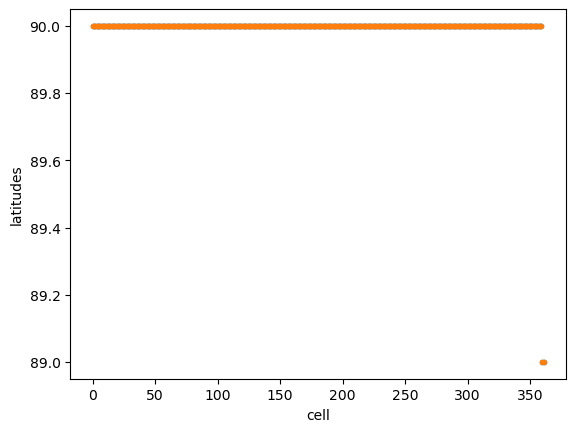

In [36]:
agefs.latitudes[:362].plot(linestyle="", marker=".")
ugefs.latitudes[:362].plot(linestyle="", marker=".")

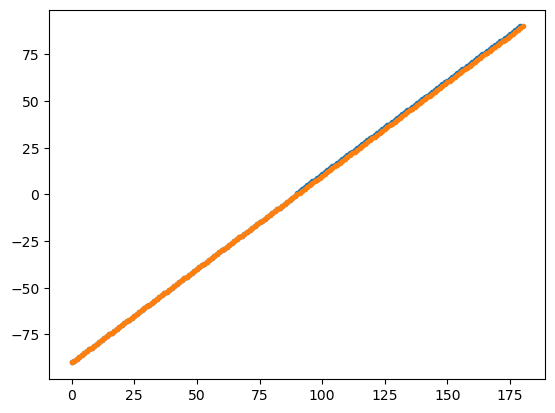

In [37]:
plt.plot(np.unique(agefs.latitudes),ls="", marker=".")
plt.plot(np.unique(ugefs.latitudes),ls="", marker=".")

In [38]:
assert np.allclose(agefs.latitudes.values, ugefs.latitudes.values)

AssertionError: 

In [39]:
assert np.allclose(agefs.longitudes.values, ugefs.longitudes.values)

AssertionError: 

## Check forcings

In [40]:
for name in [
    #"latitude",
    "cos_latitude",
    "sin_latitude",
    #"longitude",
    "cos_longitude",
    "sin_longitude",
    "cos_julian_day",
    "sin_julian_day",
    "cos_local_time",
    "sin_local_time",
    "cos_solar_zenith_angle",
    "insolation",
]:
    adx = agefs.attrs["variables"].index(name)
    avals = agefs["data"].isel(variable=adx).values
    amax = agefs["maximum"].isel(variable=adx).values
    udx = adx #ugefs.attrs["variables"].index(f"ufs2arco_forcing_{name}")
    uvals = ugefs["data"].isel(variable=udx).values
    umax = ugefs["maximum"].isel(variable=udx).values
    if not np.allclose(avals, uvals):
        print(f"{name} {np.max(np.abs(avals-uvals))}")

## Check attributes

In [41]:
for key, val in ugefs.attrs.items():
    print(key)
    print(val)
    if key in agefs.attrs:
        print(agefs.attrs[key] )
    else:
        print(f"{key} not in anemoi")
    print()

allow_nans
True
False

description
This is a test dataset
No description provided.

end_date
2017-01-02T18:00:00
2017-01-02T18:00:00

ensemble_dimension
3
3

field_shape
[181, 360]
[181, 360]

flatten_grid
True
True

frequency
6h
6h

latest_write_timestamp
2025-03-24T13:36:45
2025-03-24T16:53:33.111831

recipe
{'attrs': {'description': 'This is a test dataset'}, 'directories': {'cache': './anemoi-cache', 'logs': './anemoi-logs', 'zarr': './ufs2anemoi.gefs.zarr'}, 'mover': {'name': 'mpidatamover'}, 'source': {'fhr': {'end': 0, 'start': 0, 'step': 1}, 'levels': [100, 150, 200, 250, 500, 850, 1000], 'member': {'end': 2, 'start': 0, 'step': 1}, 'name': 'aws_gefs_archive', 't0': {'end': '2017-01-02T18', 'freq': '6h', 'start': '2017-01-01T00'}, 'variables': ['sp', 't2m', 't', 'gh']}, 'target': {'chunks': {'cell': -1, 'ensemble': 1, 'time': 1, 'variable': -1}, 'forcings': ['cos_latitude', 'sin_latitude', 'cos_longitude', 'sin_longitude', 'cos_julian_day', 'sin_julian_day', 'cos_local_time', '

In [42]:
ugefs.attrs["variables_metadata"]['gh_100']["mars"]

{'date': '20170101',
 'level': 100,
 'number': [0, 1, 2],
 'param': 'gh',
 'step': 0,
 'time': '0000',
 'valid_datetime': '2017-01-01T00:00:00',
 'variable': 'gh'}

In [43]:
agefs.attrs["variables_metadata"]['gh_100']["mars"]

{'date': '20170101',
 'level': 100,
 'number': [0, 1, 2],
 'param': 'gh',
 'step': 0,
 'time': '0000',
 'valid_datetime': '2017-01-01T00:00:00',
 'variable': 'gh'}

In [44]:
ugefs.attrs["variables_metadata"]["cos_latitude"]

{'mars': {'date': '20170101',
  'number': [0, 1, 2],
  'param': 'cos_latitude',
  'step': 0,
  'time': '0000',
  'valid_datetime': '2017-01-01T00:00:00',
  'variable': 'cos_latitude'}}

In [45]:
agefs.attrs["variables_metadata"]["cos_latitude"]


{'computed_forcing': True, 'constant_in_time': True}

In [46]:
for k in agefs.attrs.keys():
    if k not in ugefs.attrs.keys():
        print(k)

attribution
constant_fields
data_request
history
licence
missing_dates
order_by
proj_string
provenance_load
total_number_of_files
total_size
uuid
variables_with_nans
version


In [47]:
agefs.variables_with_nans

[]

In [48]:
agefs.latest_write_timestamp

'2025-03-24T16:53:33.111831'

In [49]:
ugefs.latest_write_timestamp

'2025-03-24T13:36:45'

## Check variables and data

In [50]:
ugefs.attrs["variables"] == agefs.attrs["variables"]

True

In [51]:
key = "data"
for i, var in enumerate(agefs.attrs["variables"]):
    a = agefs[key].sel(variable=i)
    cond = ~np.isnan(a)
    a = a.values[cond]
    
    u = ugefs[key].sel(variable=i)
    u = u.values[cond]
        
    if not np.allclose(a, u):
        #if np.isnan(a):
        #    if np.allclose(0,u):
        #        print(f" -- close to 0 not nan -- {key} {var} A = {a}, {u}")
        #    else:
        #        print(f" -- not close to 0 not nan -- {key} {var} A = {a}, {u}")
        #else:
        print(f"{key} {var} {np.max(np.abs(a-u)/np.abs(a))}")

print()

In [52]:
for key in [
    "count", "stdev", "mean",
    "maximum", "minimum", "squares", "sums",
]:
    for i, var in enumerate(agefs.attrs["variables"]):
        a = agefs[key].values[i]
        u = ugefs[key].values[i]
            
        if not np.allclose(a, u):
            if np.isnan(a):
                if np.allclose(0,u):
                    print(f" -- close to 0 not nan -- {key} {var} A = {a}, {u}")
                else:
                    print(f" -- not close to 0 not nan -- {key} {var} A = {a}, {u}")
            else:
               # print(f"{key} {var} A = {a}, {u}")

                print(f"{key} {var} A = {np.max(np.abs(a-u)/np.abs(a))}")
    print()


stdev cos_julian_day A = 0.6298206780121964
stdev gh_150 A = 2.8972152712934613e-05
stdev gh_200 A = 1.4987264469001556e-05
stdev t2m A = 1.2365687517557724e-05
stdev t_200 A = 1.4074128982659063e-05
stdev t_500 A = 2.4061812538669204e-05
stdev t_850 A = 2.045690387258249e-05

 -- close to 0 not nan -- mean cos_local_time A = nan, -3.5739776188669867e-17
 -- close to 0 not nan -- mean sin_local_time A = nan, 4.852540169018486e-18


 -- close to 0 not nan -- minimum cos_solar_zenith_angle A = nan, 0.0
 -- close to 0 not nan -- minimum insolation A = nan, 0.0
 -- close to 0 not nan -- minimum sin_julian_day A = nan, 0.0


 -- close to 0 not nan -- sums cos_local_time A = nan, -5.589129159488948e-11
sums cos_longitude A = 0.9999999891991583
sums sin_latitude A = 1.0000000027939677
 -- close to 0 not nan -- sums sin_local_time A = nan, 7.58859641791787e-12
sums sin_longitude A = 1.000000001258544



In [78]:
jd.sel(t0="2020-01-01")

<xarray.DataArray ()> Size: 8B
array(0.)
Coordinates:
    t0       datetime64[ns] 8B 2020-01-01
Attributes:
    description:  julian day relative to start of year

In [80]:
import datetime
def julian_day(date):
    delta = date - datetime.datetime(date.year, 1, 1)
    return delta.days + delta.seconds / 86400.0

In [82]:
julian_day(datetime.datetime(2020,1,1))

0.0

In [52]:
cl = forcings._cos_longitude(gefs)

In [59]:
cl.sum()

<xarray.DataArray 'longitude' ()> Size: 8B
array(-1.42108547e-14)

In [57]:
cl.max()

<xarray.DataArray 'longitude' ()> Size: 8B
array(1.)

In [48]:
np.testing.assert_allclose(agefs["data"].values, ugefs["data"].values)

In [16]:
aera["data"].max("cell")

<xarray.DataArray 'data' (time: 13, variable: 16, ensemble: 1)> Size: 832B
dask.array<_nanmax_skip-aggregate, shape=(13, 16, 1), dtype=float32, chunksize=(1, 16, 1), chunktype=numpy.ndarray>
Dimensions without coordinates: time, variable, ensemble

In [21]:
(~np.isnan(aera["data"])).sum(["time", "ensemble", "cell"]).values // len(aera.cell)

array([13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13])

In [23]:
aera["data"].max?

Docstring:
max(iterable, *[, default=obj, key=func]) -> value
max(arg1, arg2, *args, *[, key=func]) -> value

With a single iterable argument, return its biggest item. The
default keyword-only argument specifies an object to return if
the provided iterable is empty.
With two or more arguments, return the largest argument.
Type:      builtin_function_or_method

In [24]:
aera.attrs

{'allow_nans': False,
 'attribution': 'unknown',
 'constant_fields': [],
 'data_request': {'area': None,
  'grid': None,
  'param_level': {},
  'param_step': {}},
 'description': 'No description provided.',
 'end_date': '2021-01-01T12:00:00',
 'ensemble_dimension': 1,
 'field_shape': [360, 179],
 'flatten_grid': True,
 'frequency': '1h',
 'history': [{'action': 'initialised',
   'timestamp': '2025-03-20T15:42:24.779758'},
  {'action': 'tmp_statistics_initialised',
   'timestamp': '2025-03-20T15:42:24.799043',
   'version': 3},
  {'action': 'init finished', 'timestamp': '2025-03-20T15:42:24.832474'},
  {'action': 'compute_statistics_end',
   'timestamp': '2025-03-20T15:42:43.553134'}],
 'latest_write_timestamp': '2025-03-20T15:42:40.494949',
 'licence': 'unknown',
 'missing_dates': [],
 'order_by': [{'valid_datetime': 'ascending'},
  {'param_level': 'ascending'},
  {'number': 'ascending'}],
 'proj_string': None,
 'provenance_load': {'distribution_names': {'_cffi_backend': 'cffi',
   'at

In [22]:
aera["count"].values // len(aera.cell)

array([10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
       10., 10., 10.])

In [46]:
custom_sort(agefs.attrs["variables"])

['gh_100',
 'gh_150',
 'gh_200',
 'gh_250',
 'gh_500',
 'gh_850',
 'gh_1000',
 'sp',
 't_100',
 't_150',
 't_200',
 't_250',
 't_500',
 't_850',
 't_1000',
 't2m']

In [14]:
bb[1] = "gh_150"
bb[2] = "gh_200"
bb[3] = "gh_250"
bb[4] = "gh_500"
bb[5] = "gh_850"
bb[6] = "gh_1000"

bb[10] = "t_150"
bb[11] = "t_200"
bb[12] = "t_250"
bb[13] = "t_500"
bb[14] = "t_850"
bb[15] = "t_1000"

In [15]:
bb

['gh_100',
 'gh_150',
 'gh_200',
 'gh_250',
 'gh_500',
 'gh_850',
 'gh_1000',
 'sp',
 't2m',
 't_100',
 't_150',
 't_200',
 't_250',
 't_500',
 't_850',
 't_1000']

In [4]:
era

<xarray.Dataset> Size: 390MB
Dimensions:                  (time: 13, longitude: 360, latitude: 181, level: 37)
Coordinates:
  * latitude                 (latitude) float64 1kB -90.0 -89.0 ... 89.0 90.0
  * level                    (level) int64 296B 1 2 3 5 7 ... 925 950 975 1000
  * longitude                (longitude) float64 3kB 0.0 1.0 2.0 ... 358.0 359.0
  * time                     (time) datetime64[ns] 104B 2021-01-01 ... 2021-0...
Data variables:
    10m_u_component_of_wind  (time, longitude, latitude) float32 3MB dask.array<chunksize=(8, 360, 181), meta=np.ndarray>
    10m_v_component_of_wind  (time, longitude, latitude) float32 3MB dask.array<chunksize=(8, 360, 181), meta=np.ndarray>
    2m_temperature           (time, longitude, latitude) float32 3MB dask.array<chunksize=(8, 360, 181), meta=np.ndarray>
    surface_pressure         (time, longitude, latitude) float32 3MB dask.array<chunksize=(8, 360, 181), meta=np.ndarray>
    temperature              (time, level, longitude, latitude) float32 125MB dask.array<chunksize=(8, 37, 360, 181), meta=np.ndarray>
    u_component_of_wind      (time, level, longitude, latitude) float32 125MB dask.array<chunksize=(8, 37, 360, 181), meta=np.ndarray>
    v_component_of_wind      (time, level, longitude, latitude) float32 125MB dask.array<chunksize=(8, 37, 360, 181), meta=np.ndarray>

In [5]:
aera = xr.open_zarr("anemoi.era5.zarr/", consolidated=False)
aera.attrs["field_shape"]

[360, 179]

In [6]:
agefs.attrs["field_shape"]

[179, 360]

In [7]:
agefs

<xarray.Dataset> Size: 38MB
Dimensions:     (variable: 6, time: 8, ensemble: 3, cell: 64440)
Dimensions without coordinates: variable, time, ensemble, cell
Data variables:
    count       (variable) float64 48B dask.array<chunksize=(6,), meta=np.ndarray>
    data        (time, variable, ensemble, cell) float32 37MB dask.array<chunksize=(1, 6, 1, 64440), meta=np.ndarray>
    dates       (time) datetime64[s] 64B dask.array<chunksize=(8,), meta=np.ndarray>
    has_nans    (variable) object 48B dask.array<chunksize=(6,), meta=np.ndarray>
    latitudes   (cell) float64 516kB dask.array<chunksize=(32220,), meta=np.ndarray>
    longitudes  (cell) float64 516kB dask.array<chunksize=(32220,), meta=np.ndarray>
    maximum     (variable) float64 48B dask.array<chunksize=(6,), meta=np.ndarray>
    mean        (variable) float64 48B dask.array<chunksize=(6,), meta=np.ndarray>
    minimum     (variable) float64 48B dask.array<chunksize=(6,), meta=np.ndarray>
    squares     (variable) float64 48B dask.array<chunksize=(6,), meta=np.ndarray>
    stdev       (variable) float64 48B dask.array<chunksize=(6,), meta=np.ndarray>
    sums        (variable) float64 48B dask.array<chunksize=(6,), meta=np.ndarray>
Attributes: (12/30)
    allow_nans:              False
    attribution:             unknown
    constant_fields:         []
    data_request:            {'area': None, 'grid': None, 'param_level': {}, ...
    description:             No description provided.
    end_date:                2017-01-02T18:00:00
    ...                      ...
    total_size:              23791197
    uuid:                    8e6cb0a6-bc84-457e-9cb0-4cda6be56097
    variables:               ['sp', 't2m', 't_1000', 't_500', 'u10', 'v10']
    variables_metadata:      {'sp': {'mars': {'date': '20170101', 'number': [...
    variables_with_nans:     []
    version:                 0.30

In [8]:
# these are determined by the dataset to be used:
user_level = "level"
_use_level_index = False
user_lat = "latitude"
user_lon = "longitude"
user_member = "number"
user_datetime = "time"

# these are assumptions I'm making and keeping track of
_output_type = "anemoi"
_flatten_grid = True
_resolution = None

_data = "data"
_channel = "variable"
_level = "level"
_lat = "latitudes"
_lon = "longitudes"
_member = "ensemble"
_datetime = "dates"
_time = "time"

_rename = {
    user_level: "level",
    user_lat: "latitudes",
    user_lon: "longitudes",
    user_member: "ensemble",
    user_datetime: "dates",
    
}


def rename(xds):
    for key, val in _rename.items():
        if key in xds:
            print(f"Renaming {key} -> {val}")
            xds = xds.rename({key: val})
    return xds
    
def add_global_attrs(xds):
    attrs = {
        "ensemble_dimension": len(xds[_member]),
        "flatten_grid": _flatten_grid,
        "resolution": _resolution,
        "variables": [str(x) for x in xds[f"{_channel}_names"].values],
    }
    xds.attrs.update(attrs)
    return xds

def map_levels_to_suffixes(xds):
    nds = xr.Dataset()

    for name in xds.data_vars:
        if _level in xds[name].dims:
            for level in xds[name].level.values:
                idx = get_level_index(xds, level)
                ilevel = int(level)
                ilevel = ilevel if ilevel == level else level
                suffix_name = f"{name}_{ilevel}" if not _use_level_index else f"{name}_{idx}"
                nds[suffix_name] = xds[name].sel({_level: level}, drop=True)
                units = xds[_level].attrs.get('units', '')
                nds[suffix_name].attrs.update(
                    {
                        "level": ilevel,
                        "level_description": f"{name} at vertical level (index, value) = ({idx}, {ilevel}{units})",
                        "level_index": idx,
                    },
                )
        else:
            nds[name] = xds[name]
            # Is this a hack? Add the "field_shape" here
            # so that it's in the order of the data arrays, not in the dataset order
            # (they could be different)
            if "field_shape" not in nds.attrs:
                nds.attrs["field_shape"] = list(len(xds[d]) for d in xds.dims if d in (_lat, _lon))
    return nds

def stackit(xds):

    varlist = sorted(list(xds.data_vars))
    channel = [i for i, _ in enumerate(varlist)]
    channel = xr.DataArray(
        channel,
        coords={_channel: channel},
        dims=_channel,
    )
    channel_names = xr.DataArray(
        varlist,
        coords=channel.coords,
        dims=channel.dims,
    )
                
    data_vars = xr.concat(
        [
            xds[name].expand_dims({_channel: [this_channel]})
            for this_channel, name in zip(channel, varlist)
        ],
        dim=_channel
    )
    nds = data_vars.to_dataset(name=_data)
    nds[f"{_channel}_names"] = channel_names
    nds.attrs = xds.attrs.copy()
    return nds

def flatten_grid(xds):
    
    nds = xds.stack(cell2d=(_lon, _lat))
    nds["cell"] = xr.DataArray(
        np.arange(len(nds["cell2d"])),
        coords=nds["cell2d"].coords,
        dims=nds["cell2d"].dims,
        attrs={
            "description": f"logical index for 'cell2d', which is a flattened {_lon}x{_lat} array",
        },
    )
    nds = nds.swap_dims({"cell2d": "cell"})
    return nds

def check_for_ensemble(xds):
    if _member not in xds:
        print(f"Expanding fake ensemble dimension: '{_member}'")
        xds = xds.expand_dims({_member: [0]})
    return xds

def map_datetime_to_index(xds):
    t = np.arange(len(xds[_datetime]))
    xds[_time] = xr.DataArray(
        t,
        coords=xds[_datetime].coords,
        dims=xds[_datetime].dims,
        attrs={
            "description": "logical time index",
        },
    )
    xds = xds.swap_dims({_datetime: _time})
    return xds
    
def reorder_dims(xds):
    if _output_type == "anemoi":
        dim_order = ("time", _channel, "ensemble", "cell")
    else:
        raise NotImplementedError
    return xds.transpose(*dim_order)

def reset_and_sort(xds):
    xds = xds.reset_coords()
    return xds[sorted(xds.data_vars)]

def get_level_index(xds, value):
    return xds[_level].values.tolist().index(value)

In [12]:
# The following is to be done per-sample (and so also done for container creation)
result = rename(era)
result = check_for_ensemble(result) # this should go before stackit
result = map_datetime_to_index(result)
result = map_levels_to_suffixes(result)
result = stackit(result)
print(result["data"].dims, result["data"].shape)
result = flatten_grid(result)

# these two always last
result = reorder_dims(result)
result = reset_and_sort(result)

# do these for container creation only
result = add_global_attrs(result)

Renaming level -> level
Renaming latitude -> latitudes
Renaming longitude -> longitudes
Renaming time -> dates
Expanding fake ensemble dimension: 'ensemble'
('variable', 'ensemble', 'time', 'longitudes', 'latitudes') (115, 1, 13, 360, 181)


In [228]:
result

<xarray.Dataset> Size: 392MB
Dimensions:         (cell: 65160, time: 13, variable: 115, ensemble: 1)
Coordinates:
  * variable        (variable) int64 920B 0 1 2 3 4 5 ... 110 111 112 113 114
  * ensemble        (ensemble) int64 8B 0
  * time            (time) int64 104B 0 1 2 3 4 5 6 7 8 9 10 11 12
  * cell            (cell) int64 521kB 0 1 2 3 4 ... 65156 65157 65158 65159
Data variables:
    cell2d          (cell) object 521kB MultiIndex
    data            (time, variable, ensemble, cell) float32 390MB dask.array<chunksize=(8, 1, 1, 65160), meta=np.ndarray>
    dates           (time) datetime64[ns] 104B 2021-01-01 ... 2021-01-01T12:0...
    latitudes       (cell) float64 521kB -90.0 -89.0 -88.0 ... 88.0 89.0 90.0
    longitudes      (cell) float64 521kB 0.0 0.0 0.0 0.0 ... 359.0 359.0 359.0
    variable_names  (variable) <U24 11kB '10m_u_component_of_wind' ... 'v_com...
Attributes:
    field_shape:         [360, 181]
    ensemble_dimension:  1
    flatten_grid:        True
    resolution:          None
    variables:           ['10m_u_component_of_wind', '10m_v_component_of_wind...

In [229]:
for key, val in result.attrs.items():
    if key == "variables":
        print(f"{key}, a == b: {val == aera.attrs[key]}")
    else:
        print(f"{key}, {val}, {aera.attrs[key]}")

field_shape, [360, 181], [360, 179]
ensemble_dimension, 1, 1
flatten_grid, True, True
resolution, None, None
variables, a == b: False


In [230]:
aera.attrs["variables"]

['10m_u_component_of_wind',
 '10m_v_component_of_wind',
 '2m_temperature',
 'surface_pressure',
 'temperature_1000',
 'temperature_500']

In [226]:
aera.attrs

{'allow_nans': False,
 'attribution': 'unknown',
 'constant_fields': [],
 'data_request': {'area': None,
  'grid': None,
  'param_level': {},
  'param_step': {}},
 'description': 'No description provided.',
 'end_date': '2021-01-01T12:00:00',
 'ensemble_dimension': 1,
 'field_shape': [360, 179],
 'flatten_grid': True,
 'frequency': '1h',
 'history': [{'action': 'initialised',
   'timestamp': '2025-03-17T22:13:41.387106'},
  {'action': 'tmp_statistics_initialised',
   'timestamp': '2025-03-17T22:13:41.397960',
   'version': 3},
  {'action': 'init finished', 'timestamp': '2025-03-17T22:13:41.429278'},
  {'action': 'compute_statistics_end',
   'timestamp': '2025-03-17T22:14:03.582692'}],
 'latest_write_timestamp': '2025-03-17T22:13:43.966646',
 'licence': 'unknown',
 'missing_dates': [],
 'order_by': [{'valid_datetime': 'ascending'},
  {'param_level': 'ascending'},
  {'number': 'ascending'}],
 'proj_string': None,
 'provenance_load': {'distribution_names': {'_cffi_backend': 'cffi',
   'at

In [ ]:
k

In [192]:
aera.field_shape

[360, 179]

In [190]:
result

<xarray.Dataset> Size: 392MB
Dimensions:     (cell: 65160, time: 13, variable: 115, ensemble: 1)
Coordinates:
  * variable    (variable) int64 920B 0 1 2 3 4 5 6 ... 109 110 111 112 113 114
  * ensemble    (ensemble) int64 8B 0
  * time        (time) int64 104B 0 1 2 3 4 5 6 7 8 9 10 11 12
  * cell        (cell) int64 521kB 0 1 2 3 4 5 ... 65155 65156 65157 65158 65159
Data variables:
    cell2d      (cell) object 521kB MultiIndex
    data        (time, variable, ensemble, cell) float32 390MB dask.array<chunksize=(8, 1, 1, 65160), meta=np.ndarray>
    data_names  (variable) <U24 11kB '10m_u_component_of_wind' ... 'v_compone...
    dates       (time) datetime64[ns] 104B 2021-01-01 ... 2021-01-01T12:00:00
    latitudes   (cell) float64 521kB -90.0 -89.0 -88.0 -87.0 ... 88.0 89.0 90.0
    longitudes  (cell) float64 521kB 0.0 0.0 0.0 0.0 ... 359.0 359.0 359.0 359.0

In [179]:
agefs.attrs["end_date"]
agefs.dates[-1].values.astype(str)[:13]

'2017-01-02T18'

In [174]:
result

<xarray.Dataset> Size: 392MB
Dimensions:     (cell: 65160, time: 13, variable: 115, ensemble: 1)
Coordinates:
  * variable    (variable) int64 920B 0 1 2 3 4 5 6 ... 109 110 111 112 113 114
  * ensemble    (ensemble) int64 8B 0
  * time        (time) int64 104B 0 1 2 3 4 5 6 7 8 9 10 11 12
  * cell        (cell) int64 521kB 0 1 2 3 4 5 ... 65155 65156 65157 65158 65159
Data variables:
    cell2d      (cell) object 521kB MultiIndex
    data        (time, variable, ensemble, cell) float32 390MB dask.array<chunksize=(8, 1, 1, 65160), meta=np.ndarray>
    data_names  (variable) <U24 11kB '10m_u_component_of_wind' ... 'v_compone...
    dates       (time) datetime64[ns] 104B 2021-01-01 ... 2021-01-01T12:00:00
    latitudes   (cell) float64 521kB -90.0 -89.0 -88.0 -87.0 ... 88.0 89.0 90.0
    longitudes  (cell) float64 521kB 0.0 0.0 0.0 0.0 ... 359.0 359.0 359.0 359.0

In [108]:
bbb

<xarray.Dataset> Size: 190MB
Dimensions:      (channel: 30, number: 3, time: 8, cell: 65160)
Coordinates:
  * channel      (channel) int64 240B 0 1 2 3 4 5 6 7 ... 23 24 25 26 27 28 29
  * number       (number) int64 24B 0 1 2
  * time         (time) datetime64[ns] 64B 2017-01-01 ... 2017-01-02T18:00:00
    cell2d       (cell) object 521kB MultiIndex
    longitude    (cell) float64 521kB 0.0 0.0 0.0 0.0 ... 359.0 359.0 359.0
    latitude     (cell) float64 521kB 90.0 89.0 88.0 87.0 ... -88.0 -89.0 -90.0
  * cell         (cell) int64 521kB 0 1 2 3 4 ... 65155 65156 65157 65158 65159
Data variables:
    stuff        (channel, time, number, cell) float32 188MB dask.array<chunksize=(1, 1, 1, 65160), meta=np.ndarray>
    stuff_names  (channel) <U6 720B 'sp' 't2m' 't_10' ... 't_975' 'u10' 'v10'

In [104]:
agefs.longitudes.values

array([ nan,  nan,  nan, ..., 359., 359., 359.])

In [107]:
agefs.latitudes.values

array([ 89.,  88.,  87., ..., -87., -88., -89.])

In [105]:
bbb.latitude

<xarray.DataArray 'latitude' (cell: 65160)> Size: 521kB
array([ 90.,  89.,  88., ..., -88., -89., -90.])
Coordinates:
    cell2d     (cell) object 521kB MultiIndex
    longitude  (cell) float64 521kB 0.0 0.0 0.0 0.0 ... 359.0 359.0 359.0 359.0
    latitude   (cell) float64 521kB 90.0 89.0 88.0 87.0 ... -88.0 -89.0 -90.0
  * cell       (cell) int64 521kB 0 1 2 3 4 5 ... 65155 65156 65157 65158 65159
Attributes:
    long_name:         latitude
    standard_name:     latitude
    stored_direction:  decreasing
    units:             degrees_north

In [88]:
blah

<xarray.Dataset> Size: 188MB
Dimensions:    (latitude: 181, longitude: 360, number: 3, time: 8)
Coordinates:
  * latitude   (latitude) float64 1kB 90.0 89.0 88.0 87.0 ... -88.0 -89.0 -90.0
  * longitude  (longitude) float64 3kB 0.0 1.0 2.0 3.0 ... 357.0 358.0 359.0
  * number     (number) int64 24B 0 1 2
  * time       (time) datetime64[ns] 64B 2017-01-01 ... 2017-01-02T18:00:00
Data variables: (12/30)
    sp         (time, number, latitude, longitude) float32 6MB dask.array<chunksize=(1, 1, 181, 360), meta=np.ndarray>
    t_10       (time, number, latitude, longitude) float32 6MB dask.array<chunksize=(1, 1, 181, 360), meta=np.ndarray>
    t_20       (time, number, latitude, longitude) float32 6MB dask.array<chunksize=(1, 1, 181, 360), meta=np.ndarray>
    t_30       (time, number, latitude, longitude) float32 6MB dask.array<chunksize=(1, 1, 181, 360), meta=np.ndarray>
    t_50       (time, number, latitude, longitude) float32 6MB dask.array<chunksize=(1, 1, 181, 360), meta=np.ndarray>
    t_70       (time, number, latitude, longitude) float32 6MB dask.array<chunksize=(1, 1, 181, 360), meta=np.ndarray>
    ...         ...
    t_950      (time, number, latitude, longitude) float32 6MB dask.array<chunksize=(1, 1, 181, 360), meta=np.ndarray>
    t_975      (time, number, latitude, longitude) float32 6MB dask.array<chunksize=(1, 1, 181, 360), meta=np.ndarray>
    t_1000     (time, number, latitude, longitude) float32 6MB dask.array<chunksize=(1, 1, 181, 360), meta=np.ndarray>
    t2m        (time, number, latitude, longitude) float32 6MB dask.array<chunksize=(1, 1, 181, 360), meta=np.ndarray>
    u10        (time, number, latitude, longitude) float32 6MB dask.array<chunksize=(1, 1, 181, 360), meta=np.ndarray>
    v10        (time, number, latitude, longitude) float32 6MB dask.array<chunksize=(1, 1, 181, 360), meta=np.ndarray>

In [89]:
bb

<xarray.Dataset> Size: 188MB
Dimensions:      (channel: 30, latitude: 181, longitude: 360, number: 3, time: 8)
Coordinates:
  * channel      (channel) int64 240B 0 1 2 3 4 5 6 7 ... 23 24 25 26 27 28 29
  * latitude     (latitude) float64 1kB 90.0 89.0 88.0 ... -88.0 -89.0 -90.0
  * longitude    (longitude) float64 3kB 0.0 1.0 2.0 3.0 ... 357.0 358.0 359.0
  * number       (number) int64 24B 0 1 2
  * time         (time) datetime64[ns] 64B 2017-01-01 ... 2017-01-02T18:00:00
Data variables:
    stuff        (channel, time, number, latitude, longitude) float32 188MB dask.array<chunksize=(1, 1, 1, 181, 360), meta=np.ndarray>
    stuff_names  (channel) <U6 720B 'sp' 't2m' 't_10' ... 't_975' 'u10' 'v10'

In [59]:
blah["sp"] *= 10
blah["t_100"] *= 10

In [60]:
print(gefs["sp"].values[0, 0, 0, :4])
print(gefs["t"].sel(level=100).values[0, 0, 0, :4])

[103393.16 103393.16 103393.16 103393.16]
[204.7 204.7 204.7 204.7]


In [61]:
print(blah["sp"].values[0, 0, 0, :4])
print(blah["t_100"].values[0, 0, 0, :4])

[1033931.56 1033931.56 1033931.56 1033931.56]
[2047. 2047. 2047. 2047.]


In [51]:
gefs

<xarray.Dataset> Size: 188MB
Dimensions:    (latitude: 181, level: 26, longitude: 360, number: 3, time: 8)
Coordinates:
  * latitude   (latitude) float64 1kB 90.0 89.0 88.0 87.0 ... -88.0 -89.0 -90.0
  * level      (level) float64 208B 10.0 20.0 30.0 50.0 ... 950.0 975.0 1e+03
  * longitude  (longitude) float64 3kB 0.0 1.0 2.0 3.0 ... 357.0 358.0 359.0
  * number     (number) int64 24B 0 1 2
  * time       (time) datetime64[ns] 64B 2017-01-01 ... 2017-01-02T18:00:00
Data variables:
    sp         (time, number, latitude, longitude) float32 6MB dask.array<chunksize=(1, 1, 181, 360), meta=np.ndarray>
    t          (time, number, level, latitude, longitude) float32 163MB dask.array<chunksize=(1, 1, 1, 181, 360), meta=np.ndarray>
    t2m        (time, number, latitude, longitude) float32 6MB dask.array<chunksize=(1, 1, 181, 360), meta=np.ndarray>
    u10        (time, number, latitude, longitude) float32 6MB dask.array<chunksize=(1, 1, 181, 360), meta=np.ndarray>
    v10        (time, number, latitude, longitude) float32 6MB dask.array<chunksize=(1, 1, 181, 360), meta=np.ndarray>

In [52]:
blah

<xarray.Dataset> Size: 188MB
Dimensions:    (latitude: 181, longitude: 360, number: 3, time: 8)
Coordinates:
  * latitude   (latitude) float64 1kB 90.0 89.0 88.0 87.0 ... -88.0 -89.0 -90.0
  * longitude  (longitude) float64 3kB 0.0 1.0 2.0 3.0 ... 357.0 358.0 359.0
  * number     (number) int64 24B 0 1 2
  * time       (time) datetime64[ns] 64B 2017-01-01 ... 2017-01-02T18:00:00
    level      float64 8B 10.0
Data variables: (12/30)
    sp         (time, number, latitude, longitude) float32 6MB dask.array<chunksize=(1, 1, 181, 360), meta=np.ndarray>
    t_10       (time, number, latitude, longitude) float32 6MB dask.array<chunksize=(1, 1, 181, 360), meta=np.ndarray>
    t_20       (time, number, latitude, longitude) float32 6MB dask.array<chunksize=(1, 1, 181, 360), meta=np.ndarray>
    t_30       (time, number, latitude, longitude) float32 6MB dask.array<chunksize=(1, 1, 181, 360), meta=np.ndarray>
    t_50       (time, number, latitude, longitude) float32 6MB dask.array<chunksize=(1, 1, 181, 360), meta=np.ndarray>
    t_70       (time, number, latitude, longitude) float32 6MB dask.array<chunksize=(1, 1, 181, 360), meta=np.ndarray>
    ...         ...
    t_950      (time, number, latitude, longitude) float32 6MB dask.array<chunksize=(1, 1, 181, 360), meta=np.ndarray>
    t_975      (time, number, latitude, longitude) float32 6MB dask.array<chunksize=(1, 1, 181, 360), meta=np.ndarray>
    t_1000     (time, number, latitude, longitude) float32 6MB dask.array<chunksize=(1, 1, 181, 360), meta=np.ndarray>
    t2m        (time, number, latitude, longitude) float32 6MB dask.array<chunksize=(1, 1, 181, 360), meta=np.ndarray>
    u10        (time, number, latitude, longitude) float32 6MB dask.array<chunksize=(1, 1, 181, 360), meta=np.ndarray>
    v10        (time, number, latitude, longitude) float32 6MB dask.array<chunksize=(1, 1, 181, 360), meta=np.ndarray>

In [45]:
eras

<xarray.Dataset> Size: 390MB
Dimensions:                   (latitude: 181, longitude: 360, time: 13)
Coordinates:
  * latitude                  (latitude) float64 1kB -90.0 -89.0 ... 89.0 90.0
  * longitude                 (longitude) float64 3kB 0.0 1.0 ... 358.0 359.0
  * time                      (time) datetime64[ns] 104B 2021-01-01 ... 2021-...
    level                     int64 8B 1
Data variables: (12/115)
    10m_u_component_of_wind   (time, longitude, latitude) float32 3MB dask.array<chunksize=(8, 360, 181), meta=np.ndarray>
    10m_v_component_of_wind   (time, longitude, latitude) float32 3MB dask.array<chunksize=(8, 360, 181), meta=np.ndarray>
    2m_temperature            (time, longitude, latitude) float32 3MB dask.array<chunksize=(8, 360, 181), meta=np.ndarray>
    surface_pressure          (time, longitude, latitude) float32 3MB dask.array<chunksize=(8, 360, 181), meta=np.ndarray>
    temperature_1             (time, longitude, latitude) float32 3MB dask.array<chunksize=(8, 360, 181), meta=np.ndarray>
    temperature_2             (time, longitude, latitude) float32 3MB dask.array<chunksize=(8, 360, 181), meta=np.ndarray>
    ...                        ...
    v_component_of_wind_875   (time, longitude, latitude) float32 3MB dask.array<chunksize=(8, 360, 181), meta=np.ndarray>
    v_component_of_wind_900   (time, longitude, latitude) float32 3MB dask.array<chunksize=(8, 360, 181), meta=np.ndarray>
    v_component_of_wind_925   (time, longitude, latitude) float32 3MB dask.array<chunksize=(8, 360, 181), meta=np.ndarray>
    v_component_of_wind_950   (time, longitude, latitude) float32 3MB dask.array<chunksize=(8, 360, 181), meta=np.ndarray>
    v_component_of_wind_975   (time, longitude, latitude) float32 3MB dask.array<chunksize=(8, 360, 181), meta=np.ndarray>
    v_component_of_wind_1000  (time, longitude, latitude) float32 3MB dask.array<chunksize=(8, 360, 181), meta=np.ndarray>

In [8]:
era.level.get_index?

Signature: era.level.get_index(key: 'Hashable') -> 'pd.Index'
Docstring: Get an index for a dimension, with fall-back to a default RangeIndex
File:      ~/.conda/envs/ufs2arco/lib/python3.11/site-packages/xarray/core/common.py
Type:      method